# Algoritmo para a detecção do número cromático de um grafo

### O Algoritmo

Como não há um algoritmo eficiente para a coloração de grafos, e é difícil encontrar\
um ótimo na literatura, utilizamos um algoritmo heurístico para encontrar o k, que\
nem sempre achará um valor ótimo, mas dará uma estimativa razoável.

In [44]:
import networkx as nx
import time
from matplotlib import pyplot as plt

import grafos

### Implementação do Algoritmo

In [86]:
def find_chromatic_number(graph: nx.Graph):
    colors = {0: 0}
    nodes_left = list(graph.nodes)
    
    for i in range(graph.order()):
        selected_node = max(nodes_left, key=lambda x: saturation(graph, x))
        nodes_left.remove(selected_node)
        color(graph, selected_node, colors)
        
    return colors


def saturation(graph: nx.Graph, node):
    adjacent_colors = [graph.nodes[x]["color"] for x in graph.neighbors(node)]
    return len(set(adjacent_colors))


def color(graph: nx.Graph, node, colors):
    used_colors = set([graph.nodes[x]["color"] for x in graph.neighbors(node)])
    possible_colors = [color for color in colors.keys() if color not in used_colors]
    
    if len(possible_colors) == 0:
        new_color = add_color(colors)
        graph.nodes[node]["color"] = new_color
        colors[new_color] += 1
    else:
        selected_color = min(possible_colors, key=lambda x: colors[x])
        graph.nodes[node]["color"] = selected_color
        colors[selected_color] += 1
        
        
def add_color(colors):
    max_color = max(colors.keys())
    new_color = max_color+1
    colors[new_color] = 0
    return new_color


def print_colors(graph: nx.Graph):
    print([graph.nodes[node]["color"] for node in graph.nodes()])
    

### Testando o Algoritmo

In [99]:
grafo = grafos.generate_random_connected_graph(7, 0.3, True, color=0)

In [100]:
find_chromatic_number(grafo)

{0: 3, 1: 2, 2: 2}

[1, 0, 2, 0, 1, 2, 0]


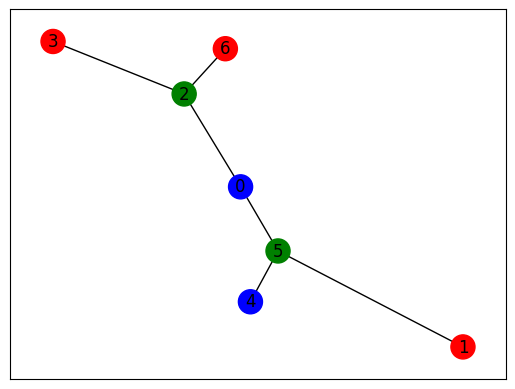

In [101]:
# desenhando um grafo colorido
cores = ["red", "blue", "green", "yellow", "black", "white", "pink"]
color_map = [cores[grafo.nodes[node]["color"]] for node in grafo.nodes()]

nx.draw_networkx(grafo, pos=nx.spring_layout(grafo), node_color=color_map)
print_colors(grafo)

### Verificando o tempo de execução

Geramos grafos de diferentes tamanhos, e comparamos o tempo de execução do algoritmo em cada um deles

In [102]:
tempos = []

tamanhos = list(range(100, 501, 50))

for size in tamanhos:
    grafo = grafos.generate_random_connected_graph(size, 0.5, color=0)
    
    tic = time.perf_counter()
    find_chromatic_number(grafo)
    toc = time.perf_counter()
    tempos.append(toc - tic)

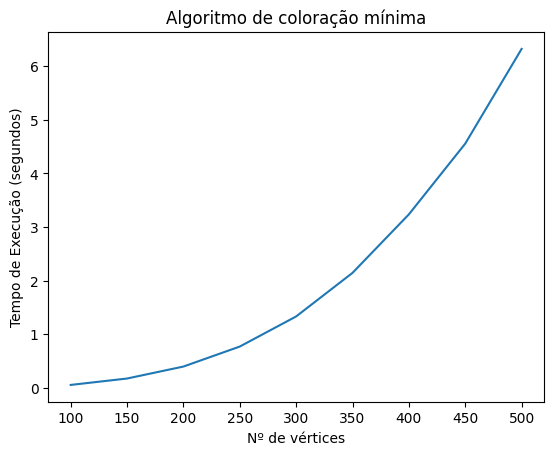

In [103]:
plt.title("Algoritmo de coloração mínima")
plt.xticks(ticks=range(0, len(tamanhos)), labels=tamanhos)
plt.xlabel("Nº de vértices")
plt.ylabel("Tempo de Execução (segundos)")
plt.plot(tempos)